# Linear Regression with Pokémon Stats

In [89]:
'''
Author: Juarez Monteiro
Dataset: Available in https://www.kaggle.com/abcsds/pokemon
Learning from https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp
'''
print "Let's get our hands dirty."

Let's get our hands dirty.


In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [10]:
# Reading the Pokémon dataset
df = pd.read_csv("../datasets/Pokemon.csv")

In [11]:
# Printing the head and the first 5 rows in the dataset
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
# Information about the dataset (800 entries)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [15]:
# Prints some statistical information
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [17]:
# Print the columns of the dataset (attributes)
df.columns

Index([u'#', u'Name', u'Type 1', u'Type 2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation',
       u'Legendary'],
      dtype='object')

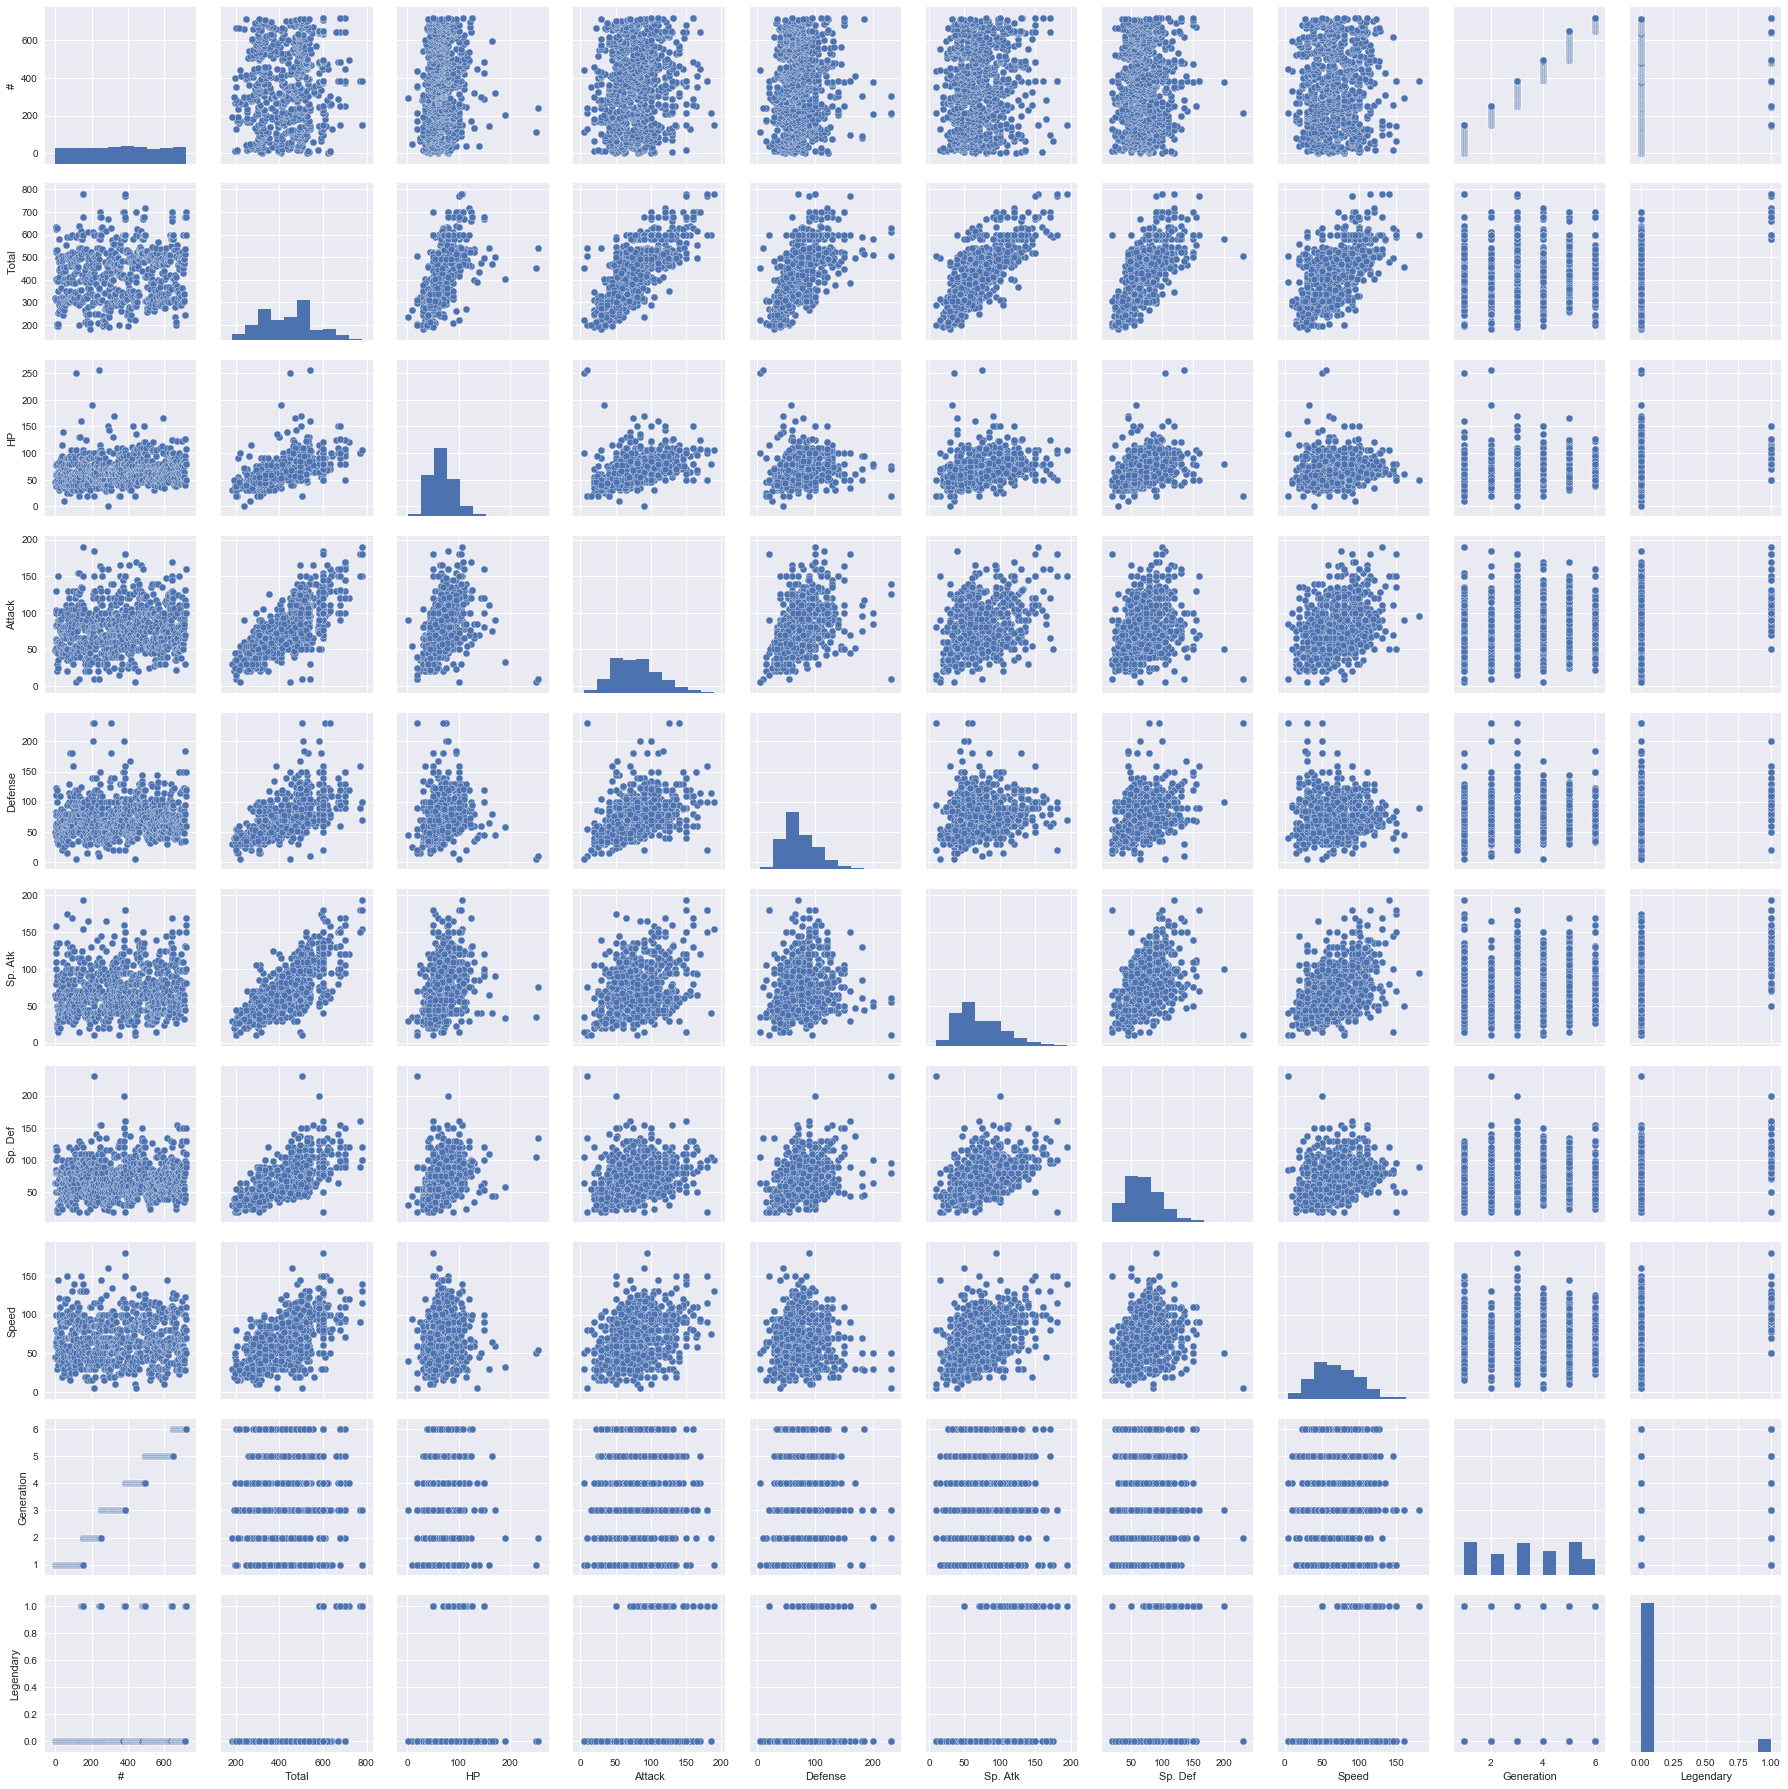

In [18]:
# Plot pairwise relationships in a dataset
sns.pairplot(df)

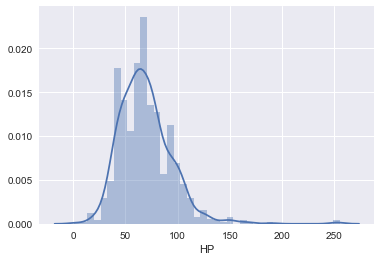

In [23]:
# Checking the distribution of the Pokémons per HP

sns.distplot(df['HP'])

In [27]:
# Dataset correlation
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


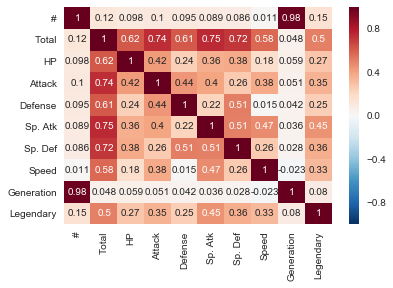

In [29]:
# Plotting the correlation

sns.heatmap(df.corr(), annot=True)

### Training Phase

In [62]:
# First we need to split our data

df.columns

Index([u'#', u'Name', u'Type 1', u'Type 2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation',
       u'Legendary'],
      dtype='object')

In [51]:
# For this example we gonna try to predict the HP of a specific Pokémon

X = df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

y = df['HP']

In [38]:
# Scikit learn comes with a function that split the dataset for you.

from sklearn.model_selection import train_test_split

In [52]:
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [53]:
# We just divided our data in X_train, y_train, X_test, and y_test
# Now we can create a model!

# Lets import a Linear Regression Model
from sklearn.linear_model import LinearRegression

In [54]:
# Here we create a Linear Regression object 

lm = LinearRegression()

In [55]:
# Starting the train phase...

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
# Returns the coefficient for each feature in X
lm.coef_

array([ 0.31911998, -0.08971074,  0.10145588,  0.29777424, -0.12626959,
        0.59753706])

In [61]:
# Organizing the coefficients for each feature

cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])
cdf

,Coeff
Attack,0.319120
Defense,-0.089711
Sp. Atk,0.101456
Sp. Def,0.297774
Speed,-0.126270
Generation,0.597537


### Testing Phase

In [65]:
# Produces the predictions for x_test
predictions = lm.predict(X_test)

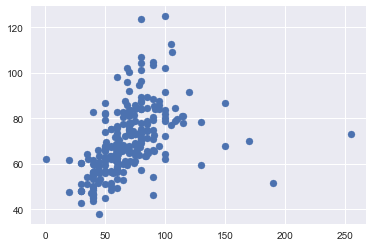

In [66]:
plt.scatter(y_test, predictions)

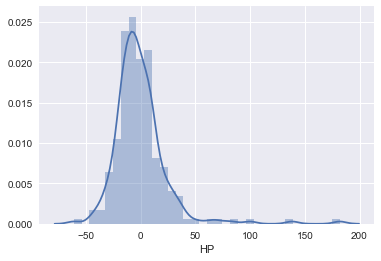

In [67]:
sns.distplot((y_test-predictions))

In [70]:
from sklearn import metrics

In [78]:
'''
There are three coomon evaluation metrics for regression problems:

    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

'''

print 'MAE: '+str(metrics.mean_absolute_error(y_test, predictions))
print 'MSE '+str(metrics.mean_squared_error(y_test, predictions))
print 'RMSE '+str(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15.9669945259
MSE 615.272393437
RMSE 24.804684909


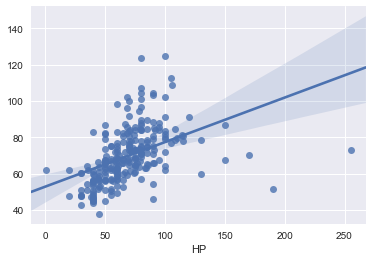

In [82]:
# As we can see our model does not work very well for the prediction of HPs 
# of some Pokémons.

sns.regplot(y_test, predictions)